In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import glob
import seaborn as sns
from scipy import stats
import pandas as pd

In [2]:
from utils import *

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('/glade/u/home/czarakas/coupled_PPE/code/utils/')

# Get met driver data

In [3]:
ds_met=xr.open_dataset('/glade/work/czarakas/data_FATES_VPD_temperature_response/K67/fluxtower_processed/'+
                       'K67_hourly.nc')

In [4]:
ds_Ta=ds_met['TA_F']+273.15
ds_FSDS=ds_met['SW_IN_F']
ds_FLDS=ds_met['LW_IN_F']
ds_P=ds_met['PA_F']*1000
ds_qstar_Ta=calculate_qsat(ds_Ta, ds_P)

In [59]:
ds_VPD=ds_met['VPD_F']*100
ds_qa=calculate_q_from_VPD(ds_VPD, ds_Ta, ds_P)

In [60]:
met_obs=met_driver_data(SWin=ds_FSDS, LWin=ds_FLDS, Ta=ds_Ta, qa=ds_qa, P=ds_P) 

# Check that it works

In [61]:
ra_ref=50
rs_ref=120
albedo_ref=0.3

delta_albedo=0.1
delta_ra=10
delta_rs=10

In [62]:
[Ts_calculated_ref, 
 SH_calculated_ref, 
 LH_calculated_ref] = solve_surf_energy_budget(met_obs=met_obs,  ra=ra_ref, 
                                               rs=rs_ref, albedo=albedo_ref)

[Ts_calculated_d_albedo, 
 SH_calculated_d_albedo, 
 LH_calculated_d_albedo] = solve_surf_energy_budget(met_obs=met_obs,  ra=ra_ref, 
                                               rs=rs_ref, albedo=albedo_ref-delta_albedo)

[Ts_calculated_d_ra, 
 SH_calculated_d_ra, 
 LH_calculated_d_ra] = solve_surf_energy_budget(met_obs=met_obs,  ra=ra_ref+delta_ra, 
                                               rs=rs_ref, albedo=albedo_ref)

[Ts_calculated_d_rs, 
 SH_calculated_d_rs, 
 LH_calculated_d_rs] = solve_surf_energy_budget(met_obs=met_obs,  ra=ra_ref, 
                                               rs=rs_ref+delta_rs, albedo=albedo_ref)

In [63]:
[dTs_dRn, 
 dTs_dra, 
 dTs_drs]=calculate_partial_derivs(met_obs=met_obs, 
                                   ra=ra_ref,
                                   rs=rs_ref,
                                   albedo=albedo_ref)

In [64]:
Rnet_1=calculate_Rn_star(met_obs.SWin, 0.3, 
                              met_obs.LWin, 1, met_obs.Ta)
Rnet_2=calculate_Rn_star(met_obs.SWin, 0.3-delta_albedo, 
                              met_obs.LWin, 1, met_obs.Ta)
delta_Rn=Rnet_2-Rnet_1

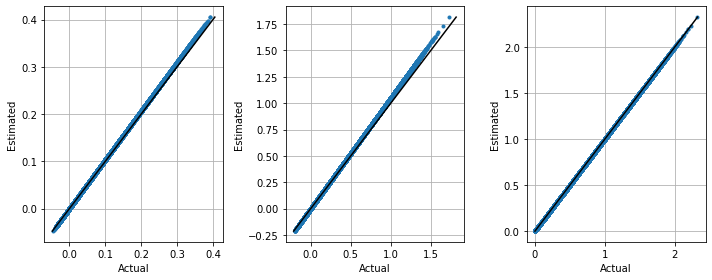

In [65]:
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.plot(Ts_calculated_d_rs-Ts_calculated_ref,
         dTs_drs*delta_rs,'.')
plt.plot([np.nanmin(dTs_drs*delta_rs),np.nanmax(dTs_drs*delta_rs)],[np.nanmin(dTs_drs*delta_rs),np.nanmax(dTs_drs*delta_rs)],'-k')
plt.grid()
plt.xlabel('Actual')
plt.ylabel('Estimated')

plt.subplot(1,3,2)
plt.plot(Ts_calculated_d_ra-Ts_calculated_ref,
         dTs_dra*delta_ra,'.')
plt.plot([np.nanmin(dTs_dra*delta_ra),np.nanmax(dTs_dra*delta_ra)],[np.nanmin(dTs_dra*delta_ra),np.nanmax(dTs_dra*delta_ra)],'-k')

plt.grid()
plt.xlabel('Actual')
plt.ylabel('Estimated')

plt.subplot(1,3,3)
plt.plot(Ts_calculated_d_albedo-Ts_calculated_ref,
         dTs_dRn*delta_Rn,'.')
plt.plot([np.nanmin(dTs_dRn*delta_Rn),np.nanmax(dTs_dRn*delta_Rn)],[np.nanmin(dTs_dRn*delta_Rn),np.nanmax(dTs_dRn*delta_Rn)],'-k')
plt.grid()
plt.xlabel('Actual')
plt.ylabel('Estimated')
plt.tight_layout()

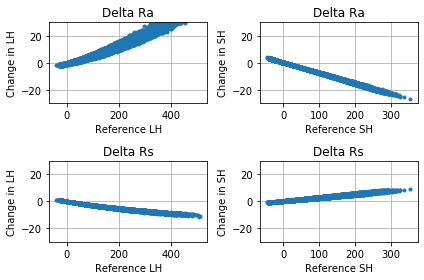

In [66]:
plt.subplot(2,2,1)
plt.plot(LH_calculated_ref, LH_calculated_d_ra-LH_calculated_ref,'.')
plt.xlabel('Reference LH')
plt.ylabel('Change in LH')
plt.title('Delta Ra')
plt.ylim([-30,30])
plt.grid()
plt.subplot(2,2,2)
plt.plot(SH_calculated_ref, SH_calculated_d_ra-SH_calculated_ref,'.')
plt.xlabel('Reference SH')
plt.ylabel('Change in SH')
plt.title('Delta Ra')
plt.ylim([-30,30])
plt.grid()
plt.subplot(2,2,3)
plt.plot(LH_calculated_ref, LH_calculated_d_rs-LH_calculated_ref,'.')
plt.xlabel('Reference LH')
plt.ylabel('Change in LH')
plt.title('Delta Rs')
plt.ylim([-30,30])
plt.grid()
plt.subplot(2,2,4)
plt.plot(SH_calculated_ref, SH_calculated_d_rs-SH_calculated_ref,'.')
plt.xlabel('Reference SH')
plt.ylabel('Change in SH')
plt.title('Delta Rs')
plt.ylim([-30,30])
plt.grid()

plt.tight_layout()

In [ ]:
+d_rs: LH goes down, SH goes up, temperature goes up
+d_ra: SH goes down, LH goes up, temperature goes up also

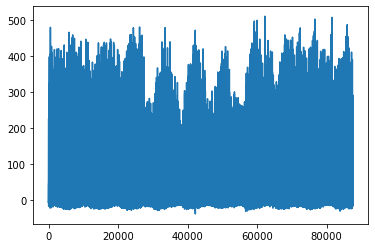

In [67]:
plt.plot(LH_calculated_ref)

(0, 1)

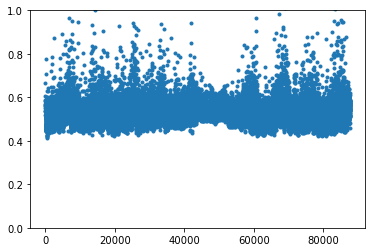

In [69]:
plt.plot(LH_calculated_ref/(SH_calculated_ref+LH_calculated_ref).where((SH_calculated_ref+LH_calculated_ref)>10),'.')
plt.ylim([0,1])

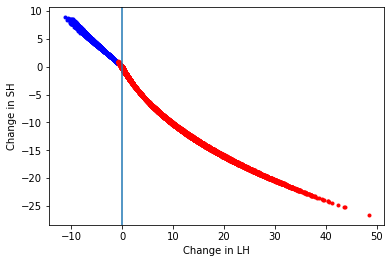

In [81]:
plt.plot((LH_calculated_d_rs-LH_calculated_ref).where((SH_calculated_ref+LH_calculated_ref)>1), 
         (SH_calculated_d_rs-SH_calculated_ref).where((SH_calculated_ref+LH_calculated_ref)>1),'.b')

plt.plot((LH_calculated_d_ra-LH_calculated_ref).where((SH_calculated_ref+LH_calculated_ref)>1),
         (SH_calculated_d_ra-SH_calculated_ref).where((SH_calculated_ref+LH_calculated_ref)>1),'.r')

plt.xlabel('Change in LH')
plt.ylabel('Change in SH')
plt.axvline(x=0)

(array([7.614e+03, 6.058e+03, 5.518e+03, 5.579e+03, 6.618e+03, 5.857e+03,
        2.905e+03, 6.540e+02, 6.900e+01, 4.000e+00]),
 array([-0.01469621,  0.15973522,  0.33416666,  0.50859809,  0.68302952,
         0.85746095,  1.03189238,  1.20632381,  1.38075524,  1.55518667,
         1.72961811]),
 <a list of 10 Patch objects>)

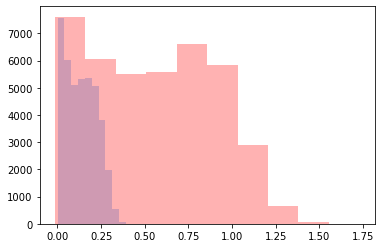

In [74]:
plt.hist((Ts_calculated_d_rs-Ts_calculated_ref).where((SH_calculated_ref+LH_calculated_ref)>1),color='dodgerblue',alpha=0.3)
plt.hist((Ts_calculated_d_ra-Ts_calculated_ref).where((SH_calculated_ref+LH_calculated_ref)>1),color='red',alpha=0.3)

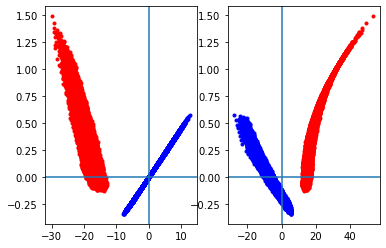

In [32]:
plt.subplot(1,2,1)
plt.plot(SH_calculated_d_rs-SH_calculated_ref, Ts_calculated_d_rs-Ts_calculated_ref,'.b', label='drx')
plt.plot(SH_calculated_d_ra-SH_calculated_ref, Ts_calculated_d_ra-Ts_calculated_ref,'.r', label='dra')
plt.axhline(y=0)
plt.axvline(x=0)
plt.subplot(1,2,2)
plt.plot(LH_calculated_d_rs-LH_calculated_ref, Ts_calculated_d_rs-Ts_calculated_ref,'.b', label='drx')
plt.plot(LH_calculated_d_ra-LH_calculated_ref, Ts_calculated_d_ra-Ts_calculated_ref,'.r', label='dra')
plt.axhline(y=0)
plt.axvline(x=0)

In [ ]:
# increasing

# Look at noise

In [15]:
Ts_noisy=Ts+np.random.normal(0,0.2,np.size(Ta))
#qa_noisy=Ts+np.random.normal(0,0.2,np.size(Ta))
Ta_noisy=Ta+np.random.normal(0,0.2,np.size(Ta))
SH_noisy=SH+np.random.normal(0,1,np.size(Ta))
LH_noisy=LH+np.random.normal(0,1,np.size(Ta))
P_noisy=P+np.random.normal(0,100,np.size(Ta))

NameError: name 'Ts' is not defined

In [16]:
Ts_noisy_daily=Ts_noisy.resample(time="1D").mean()
Ta_noisy_daily=Ta_noisy.resample(time="1D").mean()
SH_noisy_daily=SH_noisy.resample(time="1D").mean()
LH_noisy_daily=LH_noisy.resample(time="1D").mean()
P_noisy_daily=P_noisy.resample(time="1D").mean()
qa_daily=qa.resample(time="1D").mean()

NameError: name 'Ts_noisy' is not defined

In [26]:
Ts_noisy_monthly=Ts_noisy.resample(time="1M").mean()
Ta_noisy_monthly=Ta_noisy.resample(time="1M").mean()
SH_noisy_monthly=SH_noisy.resample(time="1M").mean()
LH_noisy_monthly=LH_noisy.resample(time="1M").mean()
P_noisy_monthly=P_noisy.resample(time="1M").mean()
qa_monthly=qa.resample(time="1M").mean()

In [27]:
qa_from_dailyVPD=calculate_q_from_VPD(VPD.resample(time="1D").mean(), Ta.resample(time="1D").mean())
qa_from_monthlyVPD=calculate_q_from_VPD(VPD.resample(time="1M").mean(), Ta.resample(time="1M").mean())

# Back calculate

In [13]:
ra_exact = calculate_ra(Ts_calculated_ref, met_obs.Ta, SH_calculated_ref, met_obs.P, met_obs.qa)
print(np.nanmean((ra_exact)))

rs_exact = calculate_rs(Ts_calculated_ref, met_obs.Ta, met_obs.qa, LH_calculated_ref, ra_exact, met_obs.P)
print(np.nanmean((rs_exact)))

50.0
30.0


In [14]:
#ra_calculated = calculate_ra(Ts_noisy, Ta_noisy, SH_noisy, P_noisy, qa)
#ra_calculated_daily = calculate_ra(Ts_noisy_daily, Ta_noisy_daily, SH_noisy_daily, P_noisy_daily, qa_daily)
#ra_calculated_monthly = calculate_ra(Ts_noisy_monthly, Ta_noisy_monthly, SH_noisy_monthly, P_noisy_monthly, qa_monthly)

30.0


NameError: name 'ra_calculated' is not defined

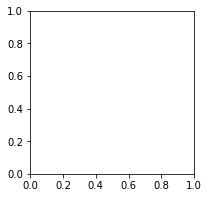

In [26]:
plt.figure(figsize=(10,3))
print(ra_exact.mean().values)
plt.subplot(1,3,1)
print(ra_calculated.mean().values)
plt.plot(ra_calculated,'.',alpha=0.2)
plt.axhline(np.nanmean(ra_calculated),linestyle='--',color='k')
plt.subplot(1,3,2)
print(ra_calculated_daily.mean().values)
plt.plot(ra_calculated_daily,'.',alpha=0.2)
plt.axhline(np.nanmean(ra_calculated_daily),linestyle='--',color='k')
plt.subplot(1,3,3)
print(ra_calculated_monthly.mean().values)
plt.plot(ra_calculated_monthly,'.',alpha=0.2)
plt.axhline(np.nanmean(ra_calculated_monthly),linestyle='--',color='k')
plt.tight_layout()

In [30]:


rs_calculated=calculate_rs(Ts_noisy, P_noisy, qa, LH_noisy, ra_calculated)
rs_calculated_daily=calculate_rs(Ts_noisy_daily, P_noisy_daily, qa_from_dailyVPD, LH_noisy_daily, ra_calculated_daily)
rs_calculated_monthly=calculate_rs(Ts_noisy_monthly, P_noisy_monthly, qa_from_monthlyVPD, LH_noisy_monthly, ra_calculated_monthly)

100.0
99.34945020556142
89.93206059775862
89.2127234620206


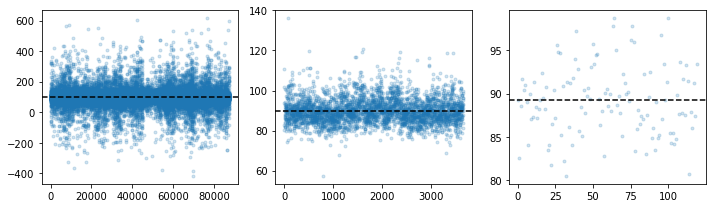

In [31]:
plt.figure(figsize=(10,3))
print(rs_exact.mean().values)
plt.subplot(1,3,1)
print(rs_calculated.mean().values)
plt.plot(rs_calculated,'.',alpha=0.2)
plt.axhline(np.nanmean(rs_calculated),linestyle='--',color='k')
plt.subplot(1,3,2)
print(rs_calculated_daily.mean().values)
plt.plot(rs_calculated_daily,'.',alpha=0.2)
plt.axhline(np.nanmean(rs_calculated_daily),linestyle='--',color='k')
plt.subplot(1,3,3)
print(rs_calculated_monthly.mean().values)
plt.plot(rs_calculated_monthly,'.',alpha=0.2)
plt.axhline(np.nanmean(rs_calculated_monthly),linestyle='--',color='k')
plt.tight_layout()

In [77]:
[Ts_calculated1, 
 SH_calculated1, 
 LH_calculated1] = solve_surf_energy_budget(met_obs=met_obs, 
                                           ra=30, 
                                           rs=100,
                                           albedo=0.3)

[Ts_calculated2, 
 SH_calculated2, 
 LH_calculated2] = solve_surf_energy_budget(met_obs=met_obs, 
                                           ra=30, 
                                           rs=100,
                                           albedo=0.2)

In [78]:
def back_calculate_ra(Ts, SH, met_obs, Cp=CONSTANT_Cp):
    Ta=met_obs.Ta
    P=met_obs.P
    qa=met_obs.qa 
    rho = calculate_rho(P, Ta, qa)
    return rho*Cp*(Ts-Ta)/SH.where(np.abs(SH)>5)

def back_calculate_rs(Ts, LH, ra, met_obs, Lv=CONSTANT_Lv):
    P=met_obs.P
    qa=met_obs.qa
    Ta=met_obs.Ta
    qsat_Ts=calculate_qsat(Ts, P)
    rho = calculate_rho(P, Ta, qa)
    ra_plus_rs= (qsat_Ts-qa)*rho*Lv/LH.where(np.abs(LH)>5)
    rs=ra_plus_rs-ra
    return rs

In [79]:
ra=back_calculate_ra(Ts_calculated1, SH_calculated1, met_obs)
rs=back_calculate_rs(Ts_calculated1, LH_calculated1, ra, met_obs)

# Attribute

In [44]:
met_obs_subset=met_driver_data(SWin=ds_FSDS[0:100], LWin=ds_FLDS[0:100], Ta=ds_Ta[0:100], 
                               qa=ds_qa[0:100], P=ds_P[0:100]) 

In [95]:
rs_range=np.arange(25,35,0.1)
Ts_range=[]
for rs_temp in rs_range:
    [Ts_temp, 
     SH_temp, 
     LH_temp] = solve_surf_energy_budget(met_obs=met_obs_subset,  ra=ra_ref, 
                                                   rs=rs_temp, albedo=albedo_ref)
    Ts_range.append(np.nanmean(Ts_temp))

In [96]:
dT_dr=(np.array(Ts_range[1:])-np.array(Ts_range[:-1]))/0.1

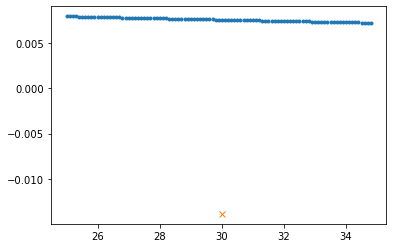

In [103]:
plt.plot(rs_range[:-1], dT_dr,'.')
plt.plot(rs_ref, np.nanmean(calculate_dTs_dr(Rnet, met_obs.qa, qsat_Ta, lambda0, 
                                  f, ra_ref, rs_ref, rho, df_dra)),'x')

In [ ]:
    qdiff=qsat_Ta-qa
    
    term1=lambda0*rho*Lv*qdiff/((ra+rs)*(ra+rs))
    term2=(1/(1+f))
    term3=Rnet-((rho*Lv*qdiff)/(ra+rs))
    dTs_dr=((term1*term2)+
             (df_dr*lambda0*term3*(term2*term2)))
    
    #dTs_dra=lambda0*( (rho*Lv*qdiff/((1+f)*(ra+rs)*(ra*rs))) -
     #         (df_dr*(Rnet-(Lv*qdiff*rho/(ra+rs)))/((1+f)*(1+f)))
      #      )
    return dTs_dr

In [101]:
# REALLY should be right
delta=calculate_delta(met_obs.Ta)
gamma=calculate_gamma(met_obs.P)
lambda0 = calculate_lambda0(met_obs.Ta)
##########################
# these also look good
rho = calculate_rho(met_obs.P, met_obs.Ta, met_obs.qa)
ro = calculate_ro(rho, lambda0)

#
qsat_Ta = calculate_qsat(met_obs.Ta, met_obs.P)
df_dra=calculate_df_dra(ro, ra_ref, rs_ref, delta, gamma)
#df_dra=(-ro/(ra*ra))(1+

#we know this is right############
emissivity=1

Rnet=calculate_Rn_star(met_obs.SWin, albedo_ref, 
                          met_obs.LWin, 1, met_obs.Ta)
f = calculate_f(ro, ra_ref, rs_ref, delta, gamma) 
##########################

dTs_dra=calculate_dTs_dr(Rnet, met_obs.qa, qsat_Ta, lambda0, f, ra_ref, 
                             rs_ref, rho, df_dra)

In [37]:
plt.plot(dTs_dra*

298.39342011118583

In [3]:
Ts-Ta

NameError: name 'Ts' is not defined

In [124]:
Lv=CONSTANT_Lv
qdiff=qsat_Ta-met_obs.qa
term1=lambda0*rho*Lv*qdiff/((ra+rs)**2)
term2=1/(1+f)
term3=lambda0*(Rnet-(rho*Lv*qdiff/(ra+rs)))
term4=(ro/(ra*ra))/((1+f)*(1+f))
term5=1+((delta/gamma)*((ra/(ra+rs))**2))
dTs_dra=(term1*term2)+(term3*term4*term5)

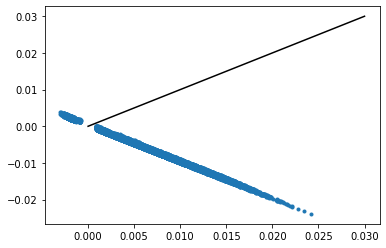

In [123]:

term1=lambda0*rho*CONSTANT_Lv*qdiff/((ra+rs)*(ra+rs))
term2=1/(1+f)
term3=Rnet-((rho*CONSTANT_Lv*qdiff)/(ra+rs))
df_dr=df_dra
plt.plot(lambda0*( (rho*CONSTANT_Lv*qdiff/((1+f)*(ra+rs)*(ra*rs))) -
              (df_dra*(Rnet-(CONSTANT_Lv*qdiff*rho/(ra+rs)))/((1+f)*(1+f)))
            ),
         ((term1*term2)+(df_dra*lambda0*term3*(term2*term2))),'.')
plt.plot([0,0.03],[0,0.03],'-k')

In [108]:
# dTs_drs is off by x6 (i.e. dTs_drs*6 would be ~ correct)
global_a1_cv2_hc0.1_rs100_cheyenne.cam.h0.20-50.mean_std.atm_vars.nc
global_a1_cv2_hc0.1_rs100_cheyenne.cam.h0.20-50.time_mean.atm_vars.nc
global_a1_cv2_hc0.1_rs100_cheyenne.clm2.h0.20-50.mean_std.lnd_vars.nc
global_a1_cv2_hc0.1_rs100_cheyenne.clm2.h0.20-50.time_mean.lnd_vars.nc

In [36]:
MML_z0h            (time, lat, lon) float32 dask.array<shape=(12, 96, 144), chunksize=(12, 96, 144)>
    MML_z0m            (time, lat, lon) float32 dask.array<shape=(12, 96, 144), chunksize=(12, 96, 144)>
    MML_zh             (time, mml_lev, lat, lon) float32 dask.array<shape=(12, 10, 96, 144), chunksize=(12, 10, 96, 144)>
    MML_zref

/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


In [50]:
test=xr.open_dataset('/glade/work/czarakas/Lague_kernels/global_a2_cv2_hc0.1_rs200_offline_b07/lnd/hist/'+
                     'global_a2_cv2_hc0.1_rs200_offline_b07.clm2.h0.1910-07.nc')

In [54]:
test.MML_alb

<xarray.DataArray 'MML_alb' (time: 1, lat: 96, lon: 144)>
array([[[0.8, 0.8, ..., 0.8, 0.8],
        [0.8, 0.8, ..., 0.8, 0.8],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) object 1910-08-01 00:00:00
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 -90.0 -88.10526 -86.210526 ... 88.10526 90.0
Attributes:
    long_name:     MML actual albedo (accounting for snow) used
    units:         unitless
    cell_methods:  time: mean

In [59]:
for i,var in enumerate(test.variables):
    if i>13:
        print(test[var].long_name)

coordinate longitude
coordinate latitude
grid cell areas
land fraction
land/ocean mask (0.=ocean and 1.=land)
pft real/fake mask (0.=fake and 1.=real)
index of shallowest bedrock layer
MML actual albedo (accounting for snow) used
MML soil water bucket capacity (maximum water soil can hold)
MML specific heat of air at constant pressure at ref height
MML heat capacity of each soil layer (depends on soil type)
MML temporary 1d diagnostic var 1
MML temporary 2d diagnostic var 1
MML temporary 1d diagnostic var 2
MML temporary 2d diagnostic var 2
MML temporary 1d diagnostic var 3
MML temporary 2d diagnostic var 3
MML temperature tendency in each soil layer
MML thickness of each soil layer
MML vapor pressure at reference height
MML evapotranspiration (in kg water over whole time step)
MML like stomatal resistance of soil
MML net flux of longwave at surface (out-in), pos out of land
MML incoming shortwave radiation
MML incoming shortwave nir direct radiation
MML incoming shortwave nir diffuse 

In [42]:
#ds_rs200
delta_ts=(ds_rs200.MML_ts-ds_a2.MML_ts).mean(dim='time')
delta_rs=(ds_rs200.MML_evap_rs-ds_a2.MML_evap_rs)
print(delta_ts.sel(lat=-4.7, lon=300, method='nearest').load())
print(delta_rs.sel(lat=-4.7, lon=300, method='nearest').load())

<xarray.DataArray 'MML_ts' ()>
array(0.358437, dtype=float32)
Coordinates:
    lon      float32 300.0
    lat      float32 -4.736842
<xarray.DataArray 'MML_evap_rs' (time: 12)>
array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.],
      dtype=float32)
Coordinates:
  * time     (time) object 1884-08-02 12:00:00 ... 1885-07-02 12:00:00
    lon      float32 300.0
    lat      float32 -4.736842


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [35]:
delta_ts=(ds_a1.MML_ts-ds_a2.MML_ts).mean(dim='time')
delta_albedo=(ds_a1.MML_alb-ds_a2.MML_alb)
print(delta_ts.sel(lat=-4.7, lon=300, method='nearest').load())
print(delta_albedo.sel(lat=-4.7, lon=300, method='nearest').load())
#.plot(vmin=-1, vmax=1, cmap=plt.cm.bwr)

<xarray.DataArray 'MML_ts' ()>
array(0.568448, dtype=float32)
Coordinates:
    lon      float32 300.0
    lat      float32 -4.736842
<xarray.DataArray 'MML_alb' (time: 12)>
array([-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1],
      dtype=float32)
Coordinates:
  * time     (time) object 1884-08-02 12:00:00 ... 1885-07-02 12:00:00
    lon      float32 300.0
    lat      float32 -4.736842


/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'MML_alb' (time: 12)>
array([-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1],
      dtype=float32)
Coordinates:
  * time     (time) object 1884-08-02 12:00:00 ... 1885-07-02 12:00:00
    lon      float32 300.0
    lat      float32 -4.736842

/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


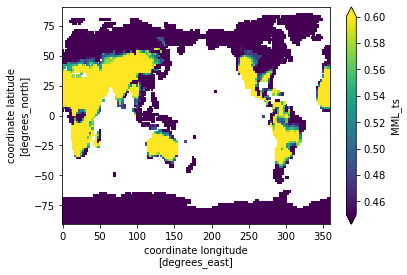

In [31]:
delta_ts.plot(vmin=0.45, vmax=0.6)

In [32]:
delta_ts.sel(lat=-4.7, lon=300, method='nearest').load()

/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'MML_ts' ()>
array(0.568448, dtype=float32)
Coordinates:
    lon      float32 300.0
    lat      float32 -4.736842

# Check a different way

In [33]:
f_calculated_monthly=(ro/ra_calculated_monthly)*(1+(delta/gamma)*(ra_calculated_monthly/(ra_calculated_monthly+rs_calculated_monthly)))

In [34]:
f_exact=(ro/ra)*(1+((delta/gamma)*(ra/(ra+rs))))

In [35]:
delta_Rnet=-Rn_star

In [80]:

dTs_dRn_exact=(lambda0/((1+f_exact)))
#*

In [84]:
30/100

0.3

In [81]:
estimated_impact=delta_Rnet*dTs_dRn_exact

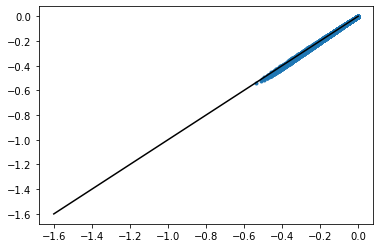

In [82]:
plt.plot(Ts_new-Ts, estimated_impact,'.')
plt.plot([-1.6,0],[-1.6,0],'-k')

In [ ]:
### WHY IS THIS OFF BY A FACTOR OF 3???
# Either Lambda0 needs to be a factor of 3 SMALLER or (1+f_exact) needs to be a factor of 3 SMALLER
# I bet this has to do with ra and rs somehow!

In [ ]:
(1+f_exact)

In [ ]:
plt.plot(estimated_impact/delta_T_actual)

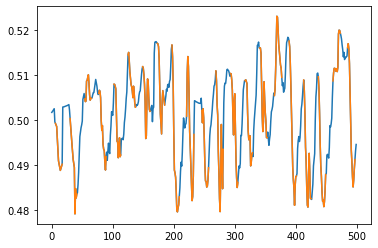

In [70]:
plt.plot(lambda0[0:500]*3)
plt.plot((estimated_impact/delta_Rnet*(1+f_exact))[0:500]) #squiggly

